In [ ]:
KODIKALLA PREETHAM KRISHNA
TASK 2
PREDICTION USING SUPERVISED ML

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
#imported required libraries

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [13]:
df.info()
#finding the data types of the given colums

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


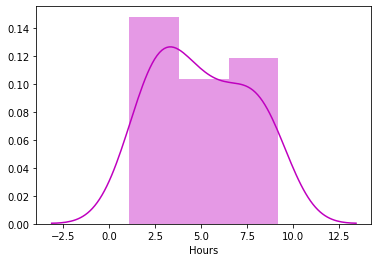

In [14]:
sns.distplot(df.Hours,color="m")
#plotting hours

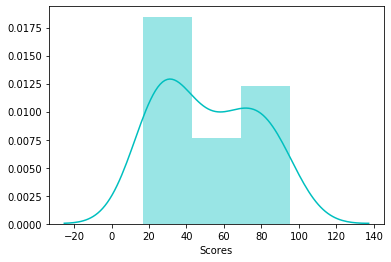

In [15]:
#plotting scores
sns.distplot(df.Scores,color="c")

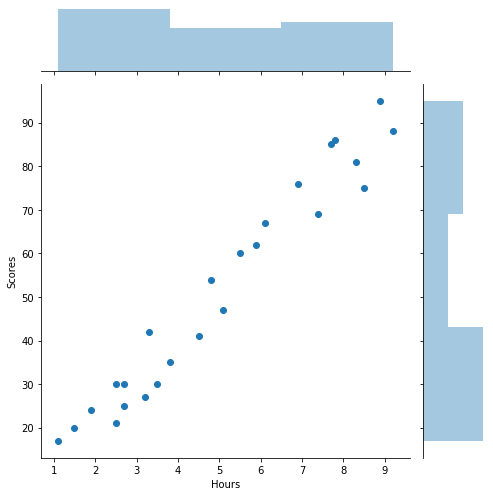

In [29]:
sns.jointplot(x="Hours",y="Scores",data=df,kind="scatter",height=7)
#describing the relation between scores and hours in scatter plot


In [17]:
X=df[["Hours"]]
print(type(X))
print(X.shape)
X.head()
#splitting the given data 

<class 'pandas.core.frame.DataFrame'>
(25, 1)


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [18]:
Y=df.Scores
print(type(Y))
print(Y.shape)
Y.head()

<class 'pandas.core.series.Series'>
(25,)


0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [19]:

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0)
#Test-Train

In [20]:
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  
linreg.fit(X_train, Y_train)
#Training Linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

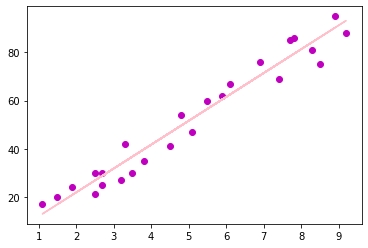

In [21]:

# Plotting the regression line
line = linreg.coef_*X+linreg.intercept_

# Plotting for the test data
plt.scatter(X, Y,color="m")
plt.plot(X, line, color="pink");
plt.show()

In [22]:

Y_pred = linreg.predict(X_test)
Y_pred[:5]
#predicting the values

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [23]:
df1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df1
#table showing actual vs prediction

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


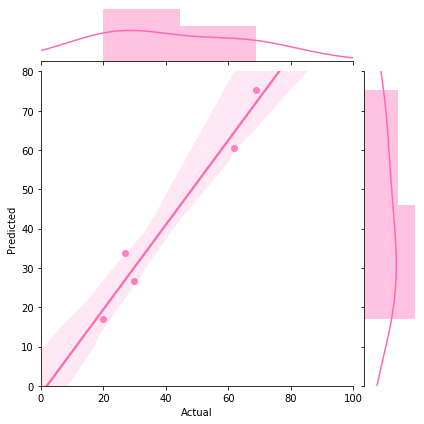

In [24]:
sns.jointplot(x="Actual",y="Predicted",xlim=(0,100),ylim=(0,80),data=df1,kind="reg",color="hotpink")
#plot showing actual and predicted values

In [25]:
#predicting the score for given hours value(9.25)
hours = 9.25
my_pred = linreg.predict([[hours]])
print("Predicted Score of a student who studies for {} hours a day is {} ".format(hours,my_pred[0]))

Predicted Score of a student who studies for 9.25 hours a day is 93.69173248737538 


In [ ]:
Calculating mean absolute error, mean square error and root mean square error

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975


In [27]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))

Mean Squared Error: 21.5987693072174


In [28]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Root Mean Squared Error: 4.6474476121003665
